# Coursework 1

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from scipy.optimize import minimize

%matplotlib inline

### Dataset Loading Functions

In [2]:
def load_mnist_dataset():

    X_train = np.load("Datasets/MNIST/mnist_train_samples.npy")
    
    Y_train = np.load("Datasets/MNIST/mnist_train_labels.npy")
    
    X_val = np.load("Datasets/MNIST/mnist_val_samples.npy")
    
    Y_val = np.load("Datasets/MNIST/mnist_val_labels.npy")
    
    return X_train, Y_train, X_val, Y_val

def load_iris_dataset():
    
    X_train = np.load("Datasets/IRIS/iris_train_samples.npy")
    
    Y_train = np.load("Datasets/IRIS/iris_train_labels.npy")

    X_val = np.load("Datasets/IRIS/iris_val_samples.npy")
    
    Y_val = np.load("Datasets/IRIS/iris_val_labels.npy")
    
    return X_train, Y_train, X_val, Y_val

## Q1 Linear Fitting

### 1.a) 
Implement the normal equation solver function nsolve, which takes as input the matrix X and the
target vector y and returns the optimized weights w. (5 points)

In [3]:
def nsolve(X, y):
    """
    Solving for normal equation solution
    """
    W_optimized = np.linalg.inv(X.T @ X) @ X.T @ y 
    return W_optimized

In [4]:
# Loadding the MNIST dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# add bias 1 into the X matrix 
X = np.c_[np.ones((len(X_train), 1)), X_train]
W = nsolve(X, Y_train)
print("Optimized Weights = ", W)

Optimized Weights =  [ 0.43185904 -0.16443234 -0.05574945  0.30241992  0.48782447]


### 1.b) 
Implement **lineFit(X,y)** which should fit a linear function to the input data. Test your implementation
on the following task: predict with linear fitting the petal length (cm) of the Iris dataset using the three
remaining variables as inputs (sepal length (cm), sepal width (cm) and petal width (cm)). Report the
L2 loss on the validation set and plot a graph showing the correlation between y and your prediction
on the validation set. (2 points)

In [5]:
def lineFit(X, y, Xtest):
    """
    lineFit(X,y) which should fit a linear function to the input data. 
    """
    # find the best parameter
    W = nsolve(X, y)

    # estimation
    y_estimated = Xtest @ W
    
    return y_estimated

In [6]:
# Loadding the MNIST dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()
# remove the petal length (cm) = 3rd input
X = X_train.copy()
print("Original - first 1 rows")
print(X[0])
print("Delete the petal length input - first 1 rows")
X = np.delete(X,2,1)
print(X[0])

# add bias 1 into the X matrix 
X = np.c_[np.ones(X.shape[0]), X]
# petal length as y
y = X_train[:,2]
print("Add bias 1 into X matrix")
print(X[0])
print("Y matrix")
print(y[0])

Original - first 1 rows
[6.  3.  4.8 1.8]
Delete the petal length input - first 1 rows
[6.  3.  1.8]
Add bias 1 into X matrix
[1.  6.  3.  1.8]
Y matrix
4.8


In [7]:
# remove the petal length (cm) = 3rd input
X_test = X_val.copy()
print("Original - first 1 rows")
print(X_test[0])
print("Delete the petal length input")
X_test = np.delete(X_val,2,1)
print(X_test[0])


# add bias 1 into the X matrix 
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
# petal length as y
y_test = X_val[:,2]
print("Add bias 1 into X matrix")
print(X_test[0])
print("Y matrix")
print(y_test[0])

Original - first 1 rows
[5.  3.4 1.6 0.4]
Delete the petal length input
[5.  3.4 0.4]
Add bias 1 into X matrix
[1.  5.  3.4 0.4]
Y matrix
1.6


In [8]:
W_optimized = nsolve(X, y)
print("Optimized W =", W_optimized)

Optimized W = [-0.30195036  0.7925747  -0.72158044  1.37750519]


In [9]:
y_estimated = lineFit(X, y, X_test)
print(y_estimated)

[1.75855173 1.88697133 7.09302762 6.01182075 4.42717236 4.84752334
 5.68385838 3.98605695 1.54100989 1.38959437 6.09817765 5.29573817
 1.41142651 5.78061391 3.83464144]


y=mx+b, m= 1.0548171244537528 , b= -0.0932659584063243


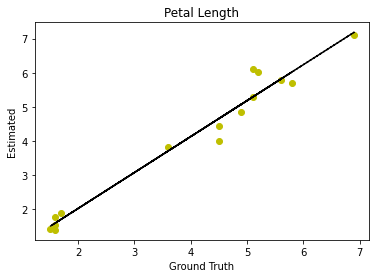

In [10]:
# find the coefficient of line equation
coef = np.polyfit(y_test,y_estimated,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.title("Petal Length")
plt.plot(y_test,y_estimated, 'yo', y_test, poly1d_fn(y_test), '--k')
plt.xlabel("Ground Truth")
plt.ylabel("Estimated")

print ("y=mx+b,", "m=", coef[0], ",", "b=", coef[1])

The graph showing that the validation data prediction and ground truth correlates very well. The linear line is show to be y=mx+b, m= 1.0548171244537528 , b= -0.0932659584063243.

In [11]:
MSE = np.mean((y_test-y_estimated) ** 2)
print(MSE)

0.1480026123203036


The L2 loss is the mean square error (MSE) between the validation test data prediction and ground truth. The validation data predictions are very well estimation to the ground truth. The MSE is relatively at 0.1480026123203036.

### 1.c)
Implement **polyFit(X,y)** which should fit a 2nd degree polynomial to the input data. Test your
implementation on the following task: predict with the polynomial the petal width (cm) of the Iris
dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm), petal length
(cm), petal width (cm)). The 2nd degree polynomial should consider all possible pairwise terms, i.e.
w1x
2 + w2xy + w3y
2 + w4x + w5y + w6 in the case of two input variables x and y. Report the L2 loss
on the validation set and plot a graph showing the correlation between y and your prediction on the
validation set. (3 points)

In [12]:
def polyFit(X, y, Xtest):
    """
    Fit a 2nd degree polynomial to the input data.
    """
    # create the dataset for polynomial features
    temp_X = []
    for row in range(X_train.shape[0]):
        first = X[row][0]
        second = X[row][1]
        third = X[row][2]
        fourth = X[row][3]
        # pairwise 2nd degree polynomial
        poly = [first, first ** 2, first * second, first * fourth, 
                second, second ** 2, second * fourth, 
                fourth, fourth ** 2]
        temp_X.append(poly)
    # convert to numpy array
    temp_X = np.array(temp_X)
    
    # find the best parameter
    W = nsolve(temp_X, y)
    
    # create the testing dataset for polynomial features
    temp_Xtest = []
    for row in range(X_val.shape[0]):
        first = Xtest[row][0]
        second = Xtest[row][1]
        third = Xtest[row][2]
        fourth = Xtest[row][3]
        
        # pairwise 2nd degree polynomial
        poly = [first, first ** 2, first * second, first * fourth, 
                second, second ** 2, second * fourth, 
                fourth, fourth ** 2]
        temp_Xtest.append(poly)
        
    # convert to numpy array    
    temp_Xtest = np.array(temp_Xtest)
    
    # find the estimation
    y_estimated = temp_Xtest @ W
    
    return y_estimated

In [13]:
# Loadding the IRIS dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# prepare the dataset 
# petal length = 3rd input 
y = []
for row in range(X_train.shape[0]):
    third = X_train[row][2]
    y.append(third)
y = np.array(y)

In [14]:
y_estimated = polyFit(X_train, y, X_val)
print(y_estimated)

[1.85123303 1.72940506 6.98140602 5.80340571 4.49072067 4.89216028
 5.602118   4.05840432 1.44204758 1.36458999 5.92334881 5.31548255
 1.51604796 5.55807041 3.96086834]


y=mx+b, m= 1.0332155215326022 , b= -0.045136676965677844


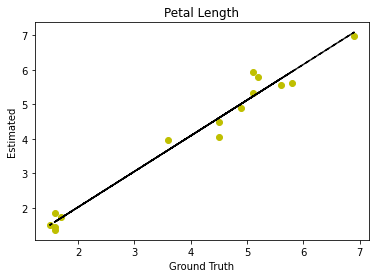

In [15]:
# find the coefficient of line equation
coef = np.polyfit(y_test,y_estimated,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.title("Petal Length")
plt.plot(y_test,y_estimated, 'yo', y_test, poly1d_fn(y_test), '--k')
plt.xlabel("Ground Truth")
plt.ylabel("Estimated")

print ("y=mx+b,", "m=", coef[0], ",", "b=", coef[1])

The graph showing that the validation data prediction and ground truth correlates very well and almost perfectly matched the gradient at 1. The linear line is show to be y=mx+b, m= 1.0332155215326022 , b= -0.045136676965677844.

In [16]:
MSE = np.mean((y_test-y_estimated) ** 2)
print(MSE)

0.10706427357791252


It is expected that the 2nd degree pairwise polynomial expect to show a perfect prediction compare to the linear fit.  The MSE is much lower than the linear fit at 0.10706427357791252.

## Q2

### 2.a)
Implement a function **pca(X, ndims)** that performs PCA over the input data X and returns both the
 ̄
mean vector X and the ndims top components. The top components are the eigen vectors linked to
the top eigen values computed from the covariance matrix. Try your function on the MNIST dataset, which is composed of 10 digit classes. Display the top 10 components fitted on the train dataset as images and check that you can reconstruct perfectly an input digit from the validation set using all components. (7 points)

In [17]:
def pca(X, ndims = 10):
    """
    performs PCA over the input data X and returns both the mean vector ¯X and the ndims top components.
    The top components are the eigen vectors linked to the top eigen values computed from the covariance matrix
    """
    
    # find the mean 
    mean = np.mean(X.T, axis = 1)
    
    # subtract the mean to the X 
    X_subtract_mean = X - mean
    
    # find the covariance 
    covariance = np.cov((X_subtract_mean.T))
        
    # find the Eigen vector and Eigen value
    eig_value, eig_vector = np.linalg.eigh(covariance)

    # sort the most important to least important Eigen vectors according to the Eigen values
    indice = eig_value.argsort()[::-1][0:ndims]
    
    # Eigen vectors 
    eig_vector = eig_vector[:, indice]
            
    return eig_vector, mean,


Display the top 10 Eigen Vector


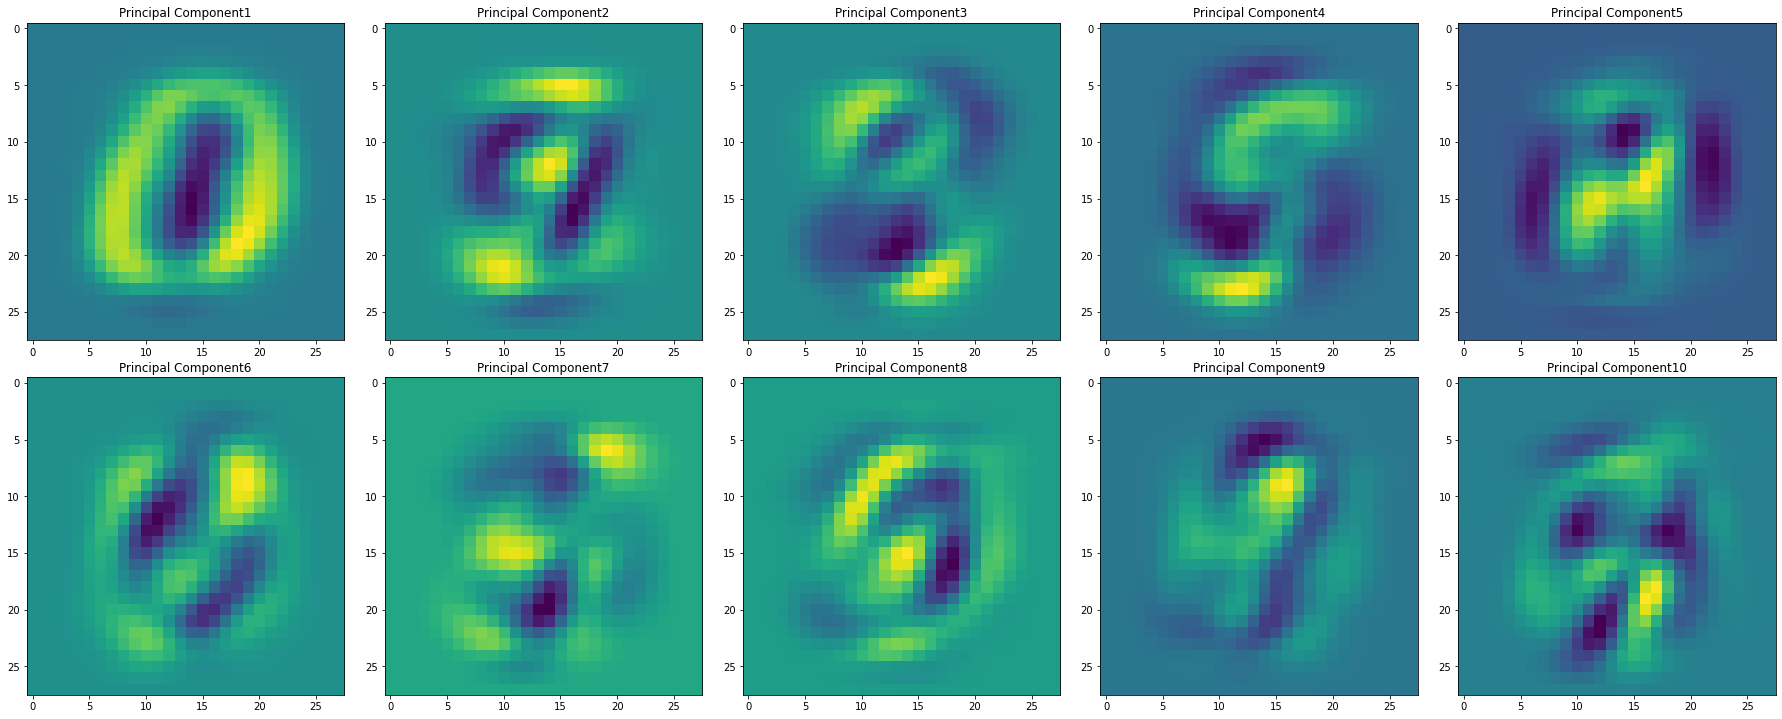

In [18]:
# Loadding the MNIST dataset
X_train, Y_train, X_val, Y_val = load_mnist_dataset()

# result 
eig_vector, mean = pca(X_train, 10)


width = 5
height = 5
rows = 2
cols = 5
axes = []


# display the result
print("Display the top 10 Eigen Vector")

fig=plt.figure(figsize=(25,10))
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Principal Component"+str(a+1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(eig_vector[:,a].reshape(28,28))
fig.tight_layout()    
plt.show()

Reconstruction using the top 10 Eigen Vectors


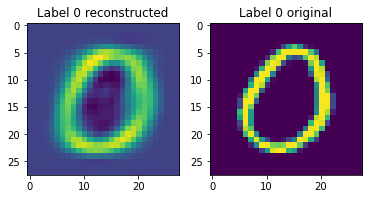

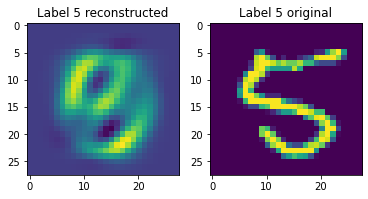

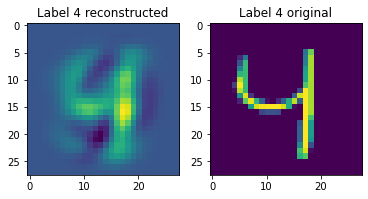

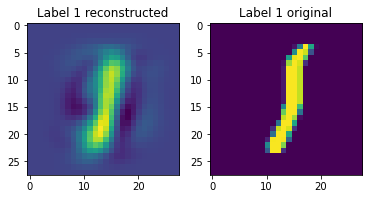

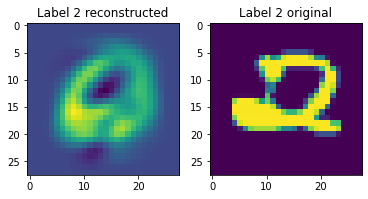

In [19]:
# result 
eig_vector, mean = pca(X_train, 10)

# Reconstruction using top 10 eigen vectors
score = np.matmul(X_train - mean, eig_vector)
X_reconstructed = np.matmul(score, eig_vector.T) + mean

# display the result
print("Reconstruction using the top 10 Eigen Vectors")
for i in range(0,5,):   
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    ax1.set_title("Label " + str(Y_train[i]) + " " + "reconstructed")
    ax1.imshow(X_reconstructed[i].reshape(28,28))
    ax2.set_title("Label " + str(Y_train[i]) + " " + "original")
    ax2.imshow(X_train[i].reshape(28,28))
plt.show()

Reconstruction using all Eigen Vectors


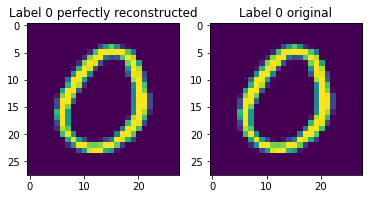

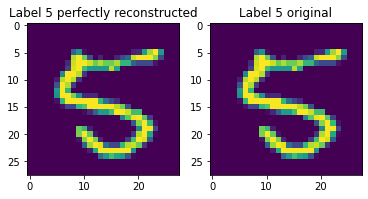

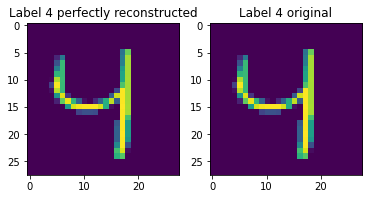

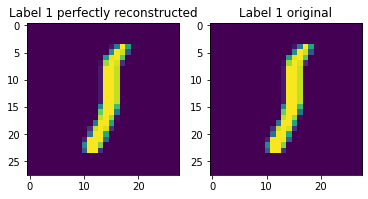

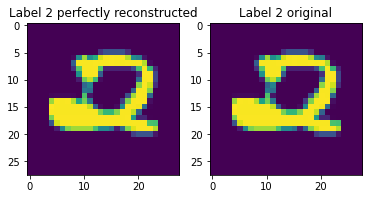

In [20]:
# result 
eig_vector, mean = pca(X_train, 784)

# Reconstruction using ALL eigen vectors
score = np.matmul(X_train - mean, eig_vector)
X_reconstructed = np.matmul(score, eig_vector.T) + mean

# display the result
print("Reconstruction using all Eigen Vectors")
for i in range(0,5,):   
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    ax1.set_title("Label " + str(Y_train[i]) + " " + "perfectly reconstructed")
    ax1.imshow(X_reconstructed[i].reshape(28,28))
    ax2.set_title("Label " + str(Y_train[i]) + " " + "original")
    ax2.imshow(X_train[i].reshape(28,28))
plt.show()



Reconstruction is perfect using all the Eigen vectors.

### 2.b) 
Perform independent research on the clustering algorithm k-means. Implement a function kmeans
performing k-means on input data X. Propose the interface to that function (i.e., what is its input and
output?) and write in three sentences why this is. Apply you Kmeans implementation on the MNIST
training set with k = 10 clusters and display the centroids as images. (4 points + 1 points on hidden
dataset)

In [21]:
def kMeans(X, k = 10):
    """
    Finds the cluster centroids
    """
    np.random.seed(10)

    # initial random centroids in the dataset
    centroids = X[np.random.choice(len(X), size=10)]
    
    # iterate to find the optimal cluster centroids
    for i in range(5):    
        
        # calculate the distance between training examples and centroids
        distance = np.zeros((len(X), k))
        for j in range(k):
            for x in range(len(X)):
                distance[x, j] = np.sum((X[x] - centroids[j]) ** 2) ** 0.5
        # find the clusters based on the shortest distance
        clusters = np.argmin(distance, axis=1)
        
        # update the centroids' location by taking the mean
        for j in range(k):
            centroids[j] = np.mean(X[clusters == j], axis=0)
        
        print("Iteration", i , clusters[0:20])
        
    return centroids

The proposed interface have 2 arguments (X - training data and number of clusters) and 1 output (the centroids of clusters). The input is determined by the training examples and number of clusters, as the cluster number can be manually decided and training examples is used to calculate the centroids' location.

Iteration 0 [8 3 3 0 7 3 3 1 1 3 3 0 3 6 3 0 2 1 3 3]
Iteration 1 [9 3 3 0 7 3 7 1 1 3 6 0 3 6 6 0 2 1 9 6]
Iteration 2 [4 7 3 0 7 3 7 1 1 0 6 0 3 6 6 0 9 1 9 6]
Iteration 3 [4 7 3 0 5 3 7 1 1 0 6 0 3 6 6 0 9 1 9 9]
Iteration 4 [4 7 7 0 5 3 7 1 1 0 6 0 3 3 6 0 9 1 9 9]
All the cluster centroids


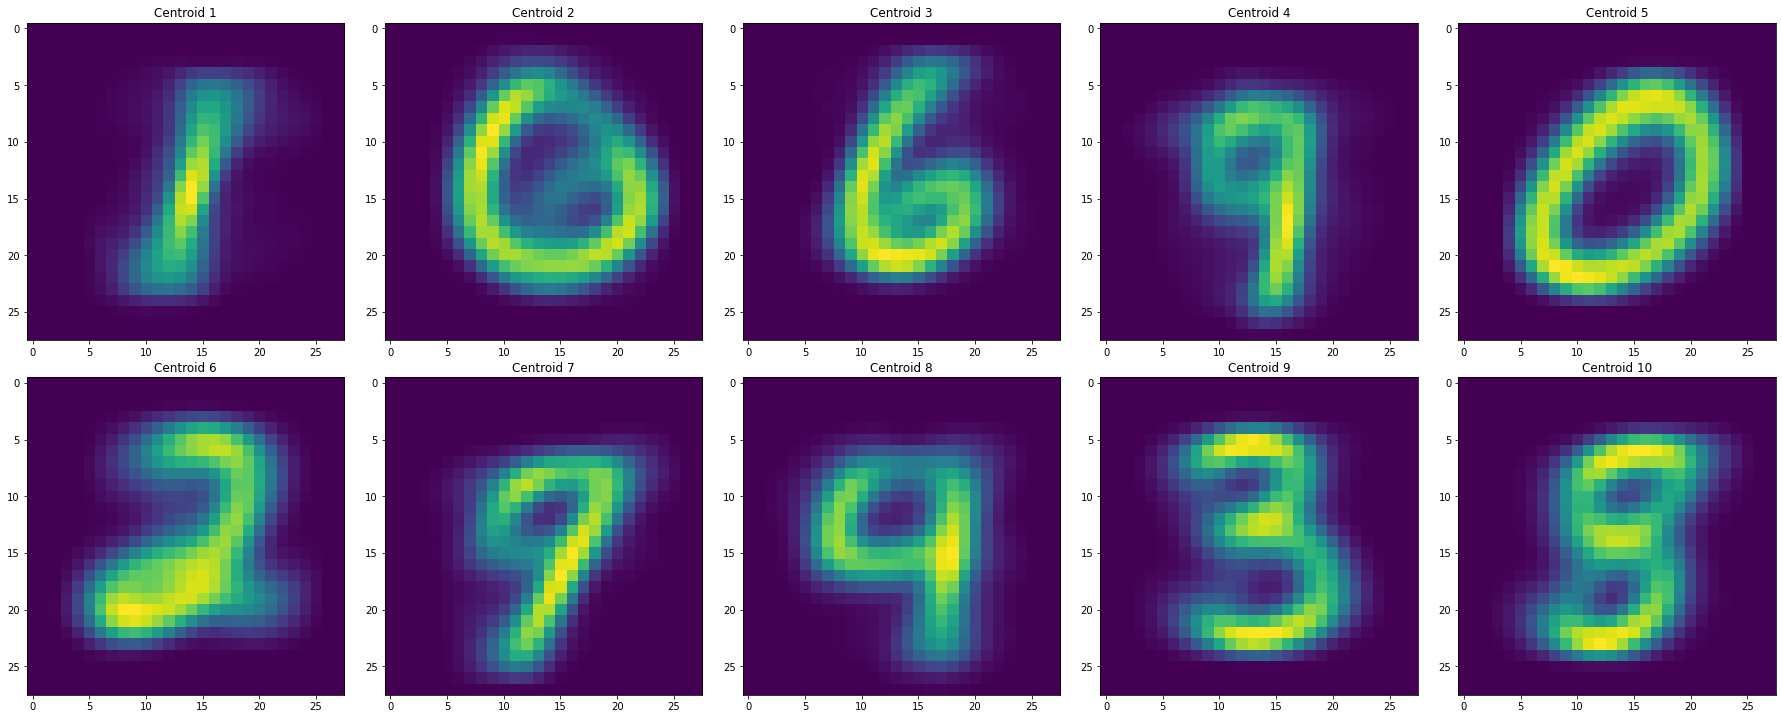

In [22]:
# Load MNIST dataset
X_train, Y_train, X_val, Y_val = load_mnist_dataset()

# result
centroids = kMeans(X_train)

width = 5
height = 5
rows = 2
cols = 5
axes = []

print("All the cluster centroids")
fig=plt.figure(figsize=(25,10))
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Centroid "+str(a+1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(centroids[a].reshape(28,28))
fig.tight_layout()    
plt.show()

### 2.c)
Describe the k-means algorithm, highlighting similarities and differences from KNN. Compare the
reconstruction loss on the validation set for both k-means and PCA. Write no more than ten sentences.
(2 points)

The K-means algorithm is a clustering algorithm mainly used in unsupervised machine learning problem. The K-means algorithm finds "K" number of clusters in the dataset to cluster the data points that have "similiar"/closer distance to the centroids.  The K-nearest neighnors (KNN) algorithms is a classification/regression algorithm in a supervised machine learning setting, it can classify an unlabelled data points in the "K" number of nearest data points and use the "K" number of data points near the unlabelled data to determine a label for the data points. 

The K-means and KNN algorithms are similar in the "K" number of things - one is for number of clusters and another is for "K" nearest data points.

The K-means clusters to data points into cluster to minimise the mean-square reconstruction error and the PCA uses a minimum number of eigen vector to represent all data points also tries to minimise the mean-square reconstruction error.

Reconstruction using the top 10 Eigen Vectors - PCA


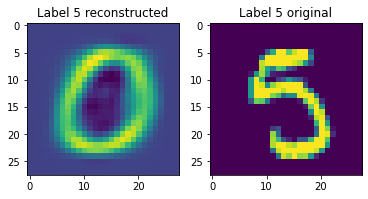

Reconstruction using K-means


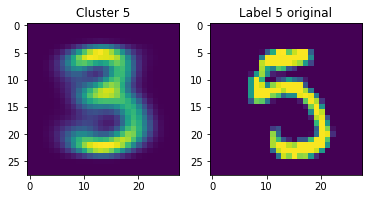

In [23]:
# result 
# eig_vector, mean = pca(X_train, 784)

# # result
# centroids = kMeans(X_train)

# Reconstruction using top 10 eigen vectors
X_val_score = np.matmul(X_train - mean, eig_vector[0:784,0:10])
X_val_reconstructed = np.matmul(X_val_score, eig_vector[0:784,0:10].T) + mean

# display the result - top 10 eigen vectors
print("Reconstruction using the top 10 Eigen Vectors - PCA")
for i in range(0,1,):   
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    ax1.set_title("Label " + str(Y_val[i]) + " " + "reconstructed")
    ax1.imshow(X_val_reconstructed[i].reshape(28,28))
    ax2.set_title("Label " + str(Y_val[i]) + " " + "original")
    ax2.imshow(X_val[i].reshape(28,28))
plt.show()

# Reconstruction using K-Means
print("Reconstruction using K-means")

# calculate the distance between validation examples and centroids
distance = np.zeros((len(X_val), 10))
for j in range(10):
    for x in range(len(X_val)):
        distance[x, j] = np.sum((X_val[x] - centroids[j]) ** 2) ** 0.5
clusters = np.argmin(distance, axis=1)  

# display the result - K means
for i in range(0,1,):   
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    ax1.set_title("Cluster " + str(Y_val[i]))
    ax1.imshow(centroids[clusters[i]].reshape(28,28))
    ax2.set_title("Label " + str(Y_val[i]) + " " + "original")
    ax2.imshow(X_val[i].reshape(28,28))
plt.show()

As can be seen from the graph above, the reconstruction loss is significant. The centroids does not have all the feature average together to resemble original input data and PCA does not reconstruct well for the limited eigen vectors.

## Q3  Linear Classification 26 points

### 3.a)
Implement the normal equation-based binary linear classifier **lclass(examplesA, examplesB, testExamples)**
where the first two arguments are the set of samples from class A and class B respectively and the third
is the test. The function should return a vector of 0s and 1s, 0 if test is in A and 1 otherwise. It should,
for simplicity, both train and test in one function call. (5 points)

In [24]:
def lclass(exampleA, exampleB, testExample):
    """
    apply linear classifcation using normal equation
    """
    
    # prepare the dataset 
    training_data = []
    for i in range(len(exampleA)):
        training_data.append(exampleA[i])
    for i in range(len(exampleB)):
        training_data.append(exampleB[i])
    training_data = np.array(training_data)
    
    # prepare the label
    labels = np.concatenate((np.zeros((len(exampleA),)), np.ones((len(exampleB),))), axis=0) 
    
    # solve for the best parameters
    W = nsolve(training_data, labels)

    return (np.matmul(testExample, W) > 0.5).astype(np.int) 

### 3.b)
Test this on all the samples in Iris, Setosa vs non-Setosa, etc and propose a simple analysis (text,
figure, table) of the result you find, but not longer than ten sentences. (5 points + 1 points on hidden
dataset)

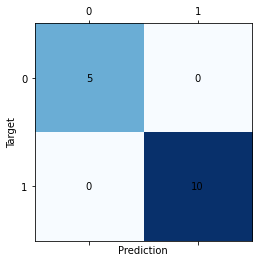

In [25]:
def getDataset(X, y):
    """
    Separate the Setosa examples and non-Setosa examples 
    """
    exampleA_Setosa = []
    exampleB_not_Setosa = []
    for i in range(len(y)):
        if(y[i] == 0):
            exampleA_Setosa.append(X[i])
        else:
            exampleB_not_Setosa.append(X[i])
    exampleA_Setosa = np.array(exampleA_Setosa)
    exampleB_not_Setosa = np.array(exampleB_not_Setosa)
    return exampleA_Setosa, exampleB_not_Setosa

def plot_confusion_matrix(cf):
    """
    Plot confusion matrix
    """
    fig, ax = plt.subplots()

    ax.matshow(cf, cmap=plt.cm.Blues)

    for i in range(len(cf)):
        for j in range(len(cf)):
            c = cf[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()

# Load the dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# Separate the examples
exampleA_Setosa, exampleB_not_Setosa = getDataset(X_train, Y_train)

# result
y_pred = lclass(exampleA_Setosa, exampleB_not_Setosa, X_val)

# Mask the validation set labels 
Y_val[Y_val > 0] = 1
Y_val[Y_val == 0] = 0

# Confusion matrix
cm = confusion_matrix(Y_val, y_pred)
plot_confusion_matrix(cm)

Setosa is 0 and non-Setosa is 1.The result is scores perfectly for the validation set as it can been seem from the confusion matrix. The normal equation performs decently to find the parameter given the amount of training examples.

### 3.c)
Perform independent research how to do multi-class classification. Implement lmclass(examples,
class, testExamples) that performs multi-class classification of the examples according to the vector of labels class of the same size and test it with testExamples by returning a matrix, where
each row expresses the probability of a sample in testExamples to belong to each class. (9 points + 1
points on hidden dataset)

In [26]:
def lmclass(examples, class_, testExamples):
    """
    Multi-class classification using softmax
    """
    
    # prepare the dataset 
    X = np.c_[np.ones((len(examples), 1)), examples]

    # prepare the labels into vector of 0s and 1s
    Y = np.zeros((len(class_), np.max(class_) + 1))

    for i in range(np.max(class_) +1):
        Y[:, i] = (class_ == i)

    # solve for best parameter
    W = nsolve(X,Y)
    
    # prepare the test dataset 
    X_test = np.c_[np.ones((len(testExamples), 1)), testExamples]
    
    # estimation for test examples
    Y_pred = X_test @ W
    
    # softmax for probablity of each class
    softmax = np.exp(Y_pred) / np.sum(np.exp(Y_pred), 1)[:,np.newaxis]
    
    return softmax

### 3.d)
Present findings applying multi-class classification on Iris dataset with 3 classes. You can include
figures and tables if needed. Write no longer than ten sentences. (5 points)

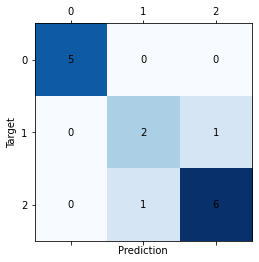

Prediction that all probabilities < 0.5
[[0.13401355 0.4077359  0.45825054]
 [0.26448745 0.3502166  0.38529594]
 [0.24222601 0.30681058 0.45096342]
 [0.1714297  0.43820555 0.39036474]
 [0.26004251 0.37695751 0.36299998]
 [0.48962418 0.32079121 0.1895846 ]
 [0.22672569 0.27431163 0.49896268]
 [0.24157266 0.27067326 0.48775408]
 [0.31713673 0.34196605 0.34089722]]


In [27]:
# Load the dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# Get the result 
result = lmclass(X_train, Y_train, X_val)

# confusion matrix
cm = confusion_matrix(Y_val, np.argmax(result, axis = 1))
plot_confusion_matrix(cm)

# examples
print("Prediction that all probabilities < 0.5")
print(result[np.max(result, axis=1) < 0.5])

There are a several ways to do multi-class classification, such as one vs all. 
The multi-class classification using the softmax perform relatively well. The misclassified rate is 2/15 for the validation dataset, as it can be seem from the confusion matrix. However, there are some low confidence predictions as it can be seem from the list of the predictions. The prediction cannot confidently predict the outcome as the prediction is not greater than the normal threshold of 0.5.

## Q4 Non-linear Classification 25 points

### 4.a)
Implement classification based on logistic regression using GD by implementing the gradient function
**deLogistic(preds, X, Y)** and optimizing using GD. preds are the prediction from the model, X are
the data and Y are the labels. Propose a function interface for your implementation of the gradient
descent algorithm. (4 points + 1 points on hidden dataset)

In [28]:
def sigmoid(x):
    """
    sigmoids function
    """
    return 1/(1 + np.exp(-x))

def loss_function(preds, targets):
    """
    cross entropy function
    """
    cost = - np.sum(targets * np.log(preds)) - np.sum((1 - targets) * np.log(1 - preds))
    return cost

def deLogistic(preds, X, Y):
    """
    gradient function
    """
    gradient = np.dot(X.T, (preds - Y))
    
    return gradient

def LogisticClassifier(X, Y, X_test):
    """
    Proposed interface: Logistic classification - binary classifier
    """
    np.random.seed(0)
    
    # Prepare the dataset 
    X = np.c_[np.ones((X_train.shape[0],1)),X_train]
        
    # parameter
    W = np.zeros((X.shape[1]))
    # cost list
    cost = []
    # paremeter list
    W_list = []
    # iteration list
    num = []
    
    # number of iterations
    numIter=1000
    # learning rate 
    Learning_rate = 0.00075
    
    # iterate to find the best parameter
    for i in range(numIter):
        # estimation
        preds = sigmoid(X @ W)
        # keep track the cost
        cost.append(loss_function(preds, Y))
        # keep track the parameter
        W_list.append(W)
        # GD
        gradient = deLogistic(preds, X, Y)
        # update the current parameter
        W = W - Learning_rate * gradient
        # track the iteration
        num.append(i)

    # prepare the test examples
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    # threshold > 0.5 - binary classification
    y_preds = sigmoid(X_test @ W) > 0.5
    
    return cost, W_list, num, (y_preds)


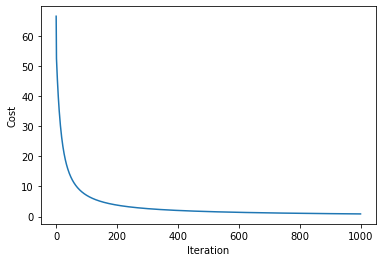

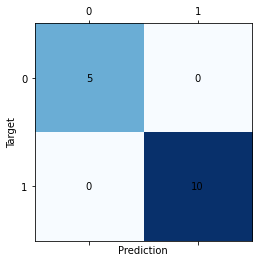

In [29]:
# Load the dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# Mask the labels
Y_train [Y_train > 0] = 1

# result
cost, w, num, y_preds = LogisticClassifier(X_train, Y_train, X_val)

# Mask the label
Y_val[Y_val > 0 ] = 1

# Plot the cost vs iteration
plt.plot(num, cost)
plt.xlabel("Iteration")
plt.ylabel("Cost")

# confusion matrix
cm = confusion_matrix(Y_val, y_preds)
plot_confusion_matrix(cm)

### 4.b)
Implement classification based on hinge loss using GD by implementing the gradient function **deHinge(preds,
W, X, Y)** and optimizing using GD. preds are the prediction from the model, W describes the model parameters, x is the data and y represent the labels. Propose a function interface for your implementation
of the gradient descent algorithm. (8 points + 2 points on hidden dataset)

In [30]:
def sgn_predict(W, X):
    """
    Sign prediction for the hinge loss
    """
    z = np.dot(X, W)
    out = np.sign(z)
    return out

def hinge_loss(z, Y):
    """
    Hinge loss
    """
    loss = np.sum(np.maximum(0, 1 - Y * z))
    return loss


def deHinge(preds, W, X, Y):
    """
    Gradient function for the hinge loss
    """
    # hinge loss
    hingeloss = np.maximum(0, 1 - preds * Y)
    # gradient 
    dJ = -X * Y[:, np.newaxis]
    # if hinge is less than 0
    dJ[hingeloss <= 0] = 0
    # average gradient per feature 
    dJ = np.mean(dJ, axis=0)
    
    return dJ

def HingeLossClassifier(X, Y, X_test):
    """
    Proposed interface: Hingeloss classification - binary classifier
    """
    np.random.seed(0)

    # prepare the dataset
    X = np.c_[np.ones((X_train.shape[0],1)),X_train]
    
    # parameter
    W = np.zeros((X.shape[1]))

    # cost list
    cost = []
    # parameter list 
    W_list = []
    # iteration list 
    num = []
    
    # number of iteration
    numIter= 200
    # learning rate 
    Learning_rate = 0.015
    
    # iterate to find the best parameter
    for i in range(numIter):
        # estimation 
        preds = np.dot(X, W)
        # keep track of the cost
        cost.append(hinge_loss(preds, Y))
        # keep track of the parameter
        W_list.append(W)
        # GD
        gradient = deHinge(preds, W, X, Y)
        # update the current parameter
        W = W - Learning_rate * gradient
        # keep track of the iteration
        num.append(i)
    
    # prepare the test examples
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    # big margin classification
    y_preds = sgn_predict(W, X_test)
    
    return cost, W_list, num, (y_preds)

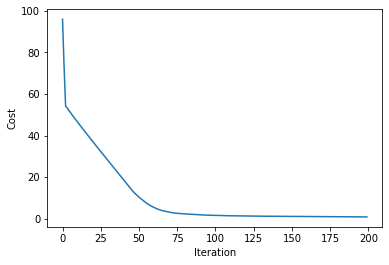

Confusion Matrix
[[ 5  0]
 [ 0 10]]


In [31]:
# Load the dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# Mask the labels for testing 
Y_train[Y_train > 0] = 1
Y_train[Y_train == 0] = -1

# Mask the labels for testing 
Y_val[Y_val > 0 ] = 1
Y_val[Y_val == 0 ] = -1

# result
cost, w, num, y_preds = HingeLossClassifier(X_train, Y_train, X_val)

# plot the cost
plt.plot(num, cost)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# confusion matrix
print("Confusion Matrix")
print(confusion_matrix(Y_val, y_preds))

### 4.c)
Implement kernel SVM function ksvm(kernel, X, Y, xtest). The function takes as input a kernel
function kernel, training data X,Y and a set of test points xtest. The function returns the set of
support vectors along with the predicted labels. You are allowed to use scipy optimization library to
solve the quadratic problem of SVM. (8 points + 2 points on hidden dataset)

In [32]:
def linear_kernel(x1, x2):
    """
    linear kernel
    """
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, offset = 1, p = 3):
    """
    polynomial kernel
    """
    return (offset + np.dot(x1, x2)) ** p

def gaussian_kernel(x1, x2, sigma = 4.0):
    """
    gaussian kernel
    """
    return np.exp( - np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))

In [33]:
from scipy.optimize import minimize
    
def objective_function(alpha, x, y, kernel):
    """
    Objective function for the scipy to minimize
    """
    m = len(x)
    
    H = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            H[i,j] = kernel(x[i], x[j]) * y[i] * y[j]
    
    objective_function = 0.5 * np.dot(alpha.T, np.dot(H, alpha)) - np.sum(alpha)
    
    return objective_function
    
def ksvm(kernel, X, Y, xtest):
    """
    kernel SVM for big margin classifier
    """
    
    np.random.seed(0)
    
    # parameters
    alpha = np.random.rand(len(X))
    # constraint for the objective
    constraint = {"type":"eq", "fun": lambda alpha : np.dot(alpha, Y), "jac": lambda alpha : Y}
    
    # the boundary of the parameters
    bound = np.zeros((len(X), 2))
    C = np.inf
    # 0 < alpha < C
    bound[:, 1] = C
    
    # minimization 
    solution = minimize(objective_function, 
                        alpha, 
                        method="SLSQP",
                        bounds=bound,
                        args=(X, Y, kernel),
                        constraints=constraint)
    
    # Solution 
    alpha = solution.x 
    
    
    # identify the support vectors
    support_vec = X[alpha > 0]
    
    # estimation for the test data
    preds = np.zeros(len(xtest))
    for i in range(len(xtest)):
        for j in range(len(X)):
            preds[i] += alpha[j] * Y[j] * kernel(X[i], X[j])
    
    # Mask the labels 
    preds[preds > 0] = 1
    preds[preds < 0] = -1
    
    # return set of support vectors, and predictions
    return support_vec, preds


In [34]:
# Load the dataset
X_train, Y_train, X_val, Y_val = load_iris_dataset()

# Mask the labels for testing
Y_train[Y_train > 0] = 1 
Y_train[Y_train == 0] = -1 

# Mask the labels for testing
Y_val[Y_val > 0] = 1 
Y_val[Y_val == 0] = -1 

In [35]:
# result
support_vec, preds = ksvm(linear_kernel, X_train, Y_train, X_val)

# list of sv
print("The list of support vectors")
print(support_vec)

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(Y_val, preds))

The list of support vectors
[[6.  3.  4.8 1.8]
 [5.5 2.4 3.7 1. ]
 [5.4 3.4 1.7 0.2]
 [6.3 2.3 4.4 1.3]
 [5.5 2.4 3.8 1.1]
 [5.8 2.6 4.  1.2]
 [5.1 3.3 1.7 0.5]
 [5.8 2.7 4.1 1. ]
 [6.9 3.1 5.4 2.1]
 [6.2 2.9 4.3 1.3]
 [5.1 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [5.6 2.7 4.2 1.3]
 [4.4 3.  1.3 0.2]
 [5.  3.5 1.3 0.3]
 [5.6 3.  4.1 1.3]
 [6.7 3.3 5.7 2.5]
 [4.8 3.4 1.6 0.2]
 [6.4 3.1 5.5 1.8]
 [5.8 4.  1.2 0.2]
 [6.4 2.9 4.3 1.3]
 [6.4 2.7 5.3 1.9]
 [6.5 2.8 4.6 1.5]
 [6.2 3.4 5.4 2.3]
 [4.9 2.5 4.5 1.7]
 [5.  3.5 1.6 0.6]
 [5.  3.4 1.5 0.2]
 [4.6 3.4 1.4 0.3]
 [5.6 2.8 4.9 2. ]
 [5.9 3.2 4.8 1.8]
 [6.1 2.6 5.6 1.4]
 [5.  3.2 1.2 0.2]
 [6.7 3.1 4.4 1.4]
 [6.7 3.1 5.6 2.4]
 [5.7 2.8 4.1 1.3]
 [6.3 3.4 5.6 2.4]
 [5.9 3.  4.2 1.5]
 [7.  3.2 4.7 1.4]
 [5.7 2.9 4.2 1.3]
 [5.1 2.5 3.  1.1]
 [7.4 2.8 6.1 1.9]
 [5.  3.3 1.4 0.2]
 [4.9 3.6 1.4 0.1]]
Confusion matrix
[[0 5]
 [2 8]]


## Q5 Neural network 25 points

### 5.a)
Devise a three-layer neural network with n hidden states and sigmoid activations for classification.
Explain how many parameters this has in one sentence. (2 points)

If network has X units (+ 1 unit for bias) in input layer and Y units (+ 1 unit for bias) in hidden layer 1-3. The weights (parameters) between input and 1st hidden layer will be of dimension Y×(X+1). The weights between the hidden layer will be (Y)×(Y+1). For a binary classifier, there is 1 units in output layer , then the weights will be of dimension 1×(Y+1). So in total, the number of weights is Y×(X+1) + 3×(Y)x(Y+1) + 1×(Y+1).

### 5.b)
Provide the equation for the gradient using chain rule for the network in point a). (8 points)

A 3-layer Neural Network

\begin{equation}
y_{prediction} = A_{layer 4} (W_4 A_{layer 3} (W_3 A_{layer 2} (W_2 A_{layer 1} (W_1 X + b_1) + b_2) + b_3) + b_4)
\end{equation}

where $A = \sigma(Z)$ is the sigmoid activation function and $Z$ is the argument of the function. 


\begin{equation}
Loss(y_{prediction}, y_{truth}) = - y_{truth} (log(y_{prediction})) - (1 - y_{truth}) (log(1 - y_{prediction}))
\end{equation}

where $Loss(y_{prediction}, y_{truth})$ is the loss function.
\begin{equation}
\frac{dLoss}{dA_{layer 4}} = \frac{dLoss}{dA_{layer 4}} = \frac{A_{layer 4} - y_{truth}}{A_{layer 4} (1 - A_{layer 4})}\\
\frac{dLoss}{dZ_{layer 4}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} = A_{layer 4} - y_{truth} \\
\frac{dLoss}{dW_{layer 4}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dW_{layer 4}} =  (A_{layer 4} - y_{truth} ) \times A_{layer 3}\\
\frac{dLoss}{db_{layer 4}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{db_{layer 4}} = \frac{1}{\text{total number of examples}}\Sigma^{\text{total number of examples}}_{i} (\frac{dLoss}{dZ_{layer 4}})_i \\
\end{equation}

\begin{equation}
\frac{dLoss}{dA_{layer 3}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} = W_{layer 4}^T A_{layer 3} \\
\frac{dLoss}{dZ_{layer 3}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} = \frac{dLoss}{dA_{layer 3}} A_{layer 3} (1 - A_{layer 3}) \\
\frac{dLoss}{dW_{layer 3}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dW_{layer 3}} = \frac{dLoss}{dZ_{layer 3}} A_{layer 2}^T\\
\frac{dLoss}{db_{layer 3}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{db_{layer 3}} = \frac{1}{\text{total number of examples}}\Sigma^{\text{total number of examples}}_{i} (\frac{dLoss}{dZ_{layer 3}})_i \\
\end{equation}

\begin{equation}
\frac{dLoss}{dA_{layer 2}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} = W_{layer 3}^T A_{layer 2} \\
\frac{dLoss}{dZ_{layer 2}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}} = \frac{dLoss}{dA_{layer 2}} A_{layer 2} (1 - A_{layer 2}) \\
\frac{dLoss}{dW_{layer 2}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}}\frac{dZ_{layer 2}}{dW_{layer 2}} = \frac{dLoss}{dZ_{layer 2}} A_{layer 1}^T\\
\frac{dLoss}{db_{layer 2}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}} \frac{dZ_{layer 2}}{db_{layer 2}} = \frac{1}{\text{total number of examples}}\Sigma^{\text{total number of examples}}_{i} (\frac{dLoss}{dZ_{layer 2}})_i \\
\end{equation}

\begin{equation}
\frac{dLoss}{dA_{layer 1}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}} \frac{dZ_{layer 2}}{dA_{layer 1}} = W_{layer 2}^T A_{layer 1} \\
\frac{dLoss}{dZ_{layer 1}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}} \frac{dZ_{layer 2}}{dA_{layer 1}} \frac{dA_{layer 1}}{dZ_{layer 1}} = \frac{dLoss}{dA_{layer 1}} A_{layer 1} (1 - A_{layer 1}) \\
\frac{dLoss}{dW_{layer 1}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}} \frac{dZ_{layer 2}}{dA_{layer 1}} \frac{dA_{layer 1}}{dZ_{layer 1}} \frac{dZ_{layer 1}}{dW_{layer 1}} = \frac{dLoss}{dZ_{layer 1}} X \\
\frac{dLoss}{db_{layer 1}} = \frac{dLoss}{dA_{layer 4}} \frac{dA_{layer 4}}{dZ_{layer 4}} \frac{dZ_{layer 4}}{dA_{layer 3}} \frac{dA_{layer 3}}{dZ_{layer 3}} \frac{dZ_{layer 3}}{dA_{layer 2}} \frac{dA_{layer 2}}{dZ_{layer 2}} \frac{dZ_{layer 2}}{dA_{layer 1}} \frac{dA_{layer 1}}{dZ_{layer 1}} \frac{dZ_{layer 1}}{db_{layer 1}} = \frac{1}{\text{total number of examples}}\Sigma^{\text{total number of examples}}_{i} (\frac{dLoss}{dZ_{layer 1}})_i \\
\end{equation}


### 5.c)
Implement the binary classifier nnclass(examplesA, examplesB, testExamples) that is trained with
your implementation of (stochastic) GD and your gradient function using the network. (8 points + 2
points on hidden dataset)

In [36]:
def compute_cost(AL, Y):
    """
    cross entropy loss between the NN prediction and ground truth
    """
    cost = - np.sum(np.multiply(np.log(AL),Y) + np.multiply(1 - Y, np.log(1 - AL))) / Y.shape[1]    
    return cost

def sigmoid(x):
    """
    sigmoid
    """
    return 1/(1 + np.exp(-x))

In [37]:
def nnclass(exampleA, exampleB, testExamples, n_h = 32):
    """
    Neural network for binary classification
    """
    np.random.seed(10)
    
    # Preparing the dataset 
    X = np.concatenate((exampleA, exampleB), axis=0)
    # normalize the dataset
    X = X/255.0
    
    # prepare the labels
    Y = np.concatenate((np.ones(len(exampleA)), np.zeros(len(exampleB))))
    # transfom the shape of labels
    Y = Y.reshape((1,len(Y)))
    
    # number of features
    n_x = X.shape[1]
    # number of examples
    m = X.shape[0]
    # learning rate
    learning_rate = 0.05

    # Weights for layer 1
    W1 = np.random.randn(n_h, n_x)
    # bias weights for layer 1
    b1 = np.zeros((n_h, 1))
    
    # Weights for layer 2 
    W2 = np.random.randn(n_h, n_h)
    # bias weights for layer 2
    b2 = np.zeros((n_h, 1))

    # Weights for layer 3
    W3 = np.random.randn(n_h, n_h)
    # bias weights for layer 3
    b3 = np.zeros((n_h, 1))
    
    # Weights for layer 4
    W4 = np.random.randn(1, n_h)
    # bias weights for layer 4
    b4 = np.zeros((1, 1))
    
    # cost list 
    cost_list = []
    # iteration list
    iter_list = []
    
    # iterate to find the best weights 
    for i in range(250):
        
        # forward propagate
        Z1 = np.matmul(W1, X.T) + b1
        A1 = sigmoid(Z1)
        
        # forward propagate
        Z2 = np.matmul(W2, A1) + b2
        A2 = sigmoid(Z2)
        
        # forward propagate        
        Z3 = np.matmul(W3, A2) + b3
        A3 = sigmoid(Z3)

        # forward propagate
        Z4 = np.matmul(W4, A3) + b4
        A4 = sigmoid(Z4)

        # compute the cost         
        cost = compute_cost(A4, Y)

        # find the gradient/derivative for layer 4
        dZ4 = A4-Y
        dW4 = (1./m) * np.matmul(dZ4, A3.T)
        db4 = (1./m) * np.sum(dZ4, axis=1, keepdims=True)

        # find the gradient/derivative for layer 3
        dA3 = np.matmul(W4.T, dZ4)
        dZ3 = dA3 * sigmoid(Z3) * (1 - sigmoid(Z3))
        dW3 = (1./m) * np.matmul(dZ3, A2.T)
        db3 = (1./m) * np.sum(dZ3, axis=1, keepdims=True)

        # find the gradient/derivative for layer 2
        dA2 = np.matmul(W3.T, dZ3)
        dZ2 = dA2 * sigmoid(Z2) * (1 - sigmoid(Z2))
        dW2 = (1./m) * np.matmul(dZ2, A1.T)
        db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

        # find the gradient/derivative for layer 1
        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1./m) * np.matmul(dZ1, X)
        db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

        # find the gradient/derivative for layer 
        W4 = W4 - learning_rate * dW4
        b4 = b4 - learning_rate * db4
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

        # keep track of the cost
        cost_list.append(cost)
        # keep track of the iteration
        iter_list.append(i)
        

    # forward propagate for the test examples
    Z1 = np.matmul(W1, testExamples.T) + b1
    A1 = sigmoid(Z1)

    # forward propagate for the test examples
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    # forward propagate for the test examples
    Z3 = np.matmul(W3, A2) + b3
    A3 = sigmoid(Z3)

    # forward propagate for the test examples
    Z4 = np.matmul(W4, A3) + b4
    # make the prediction 
    A4 = sigmoid(Z4)
    A4 = np.squeeze(A4)
    
    return A4, cost_list, iter_list

### 5.d)
Do an analysis how changes of n affect the accuracy with MNIST. Positive labels are assigned to digit 1
and negative samples to other digits. Write not longer than fifteen sentences. A table and / or plot is
welcome. (5 points)

Positive label


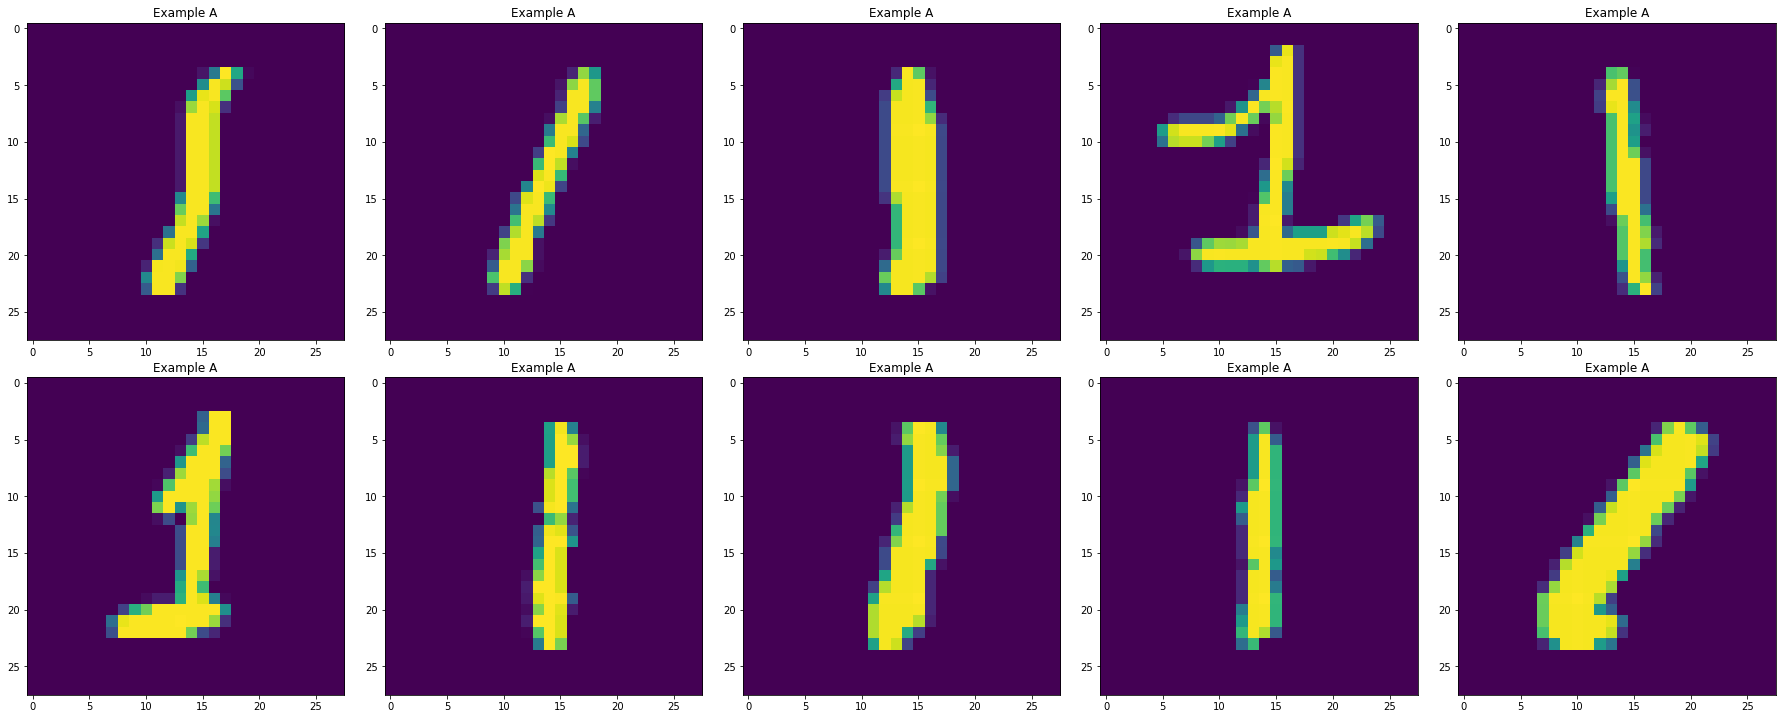

Negative label


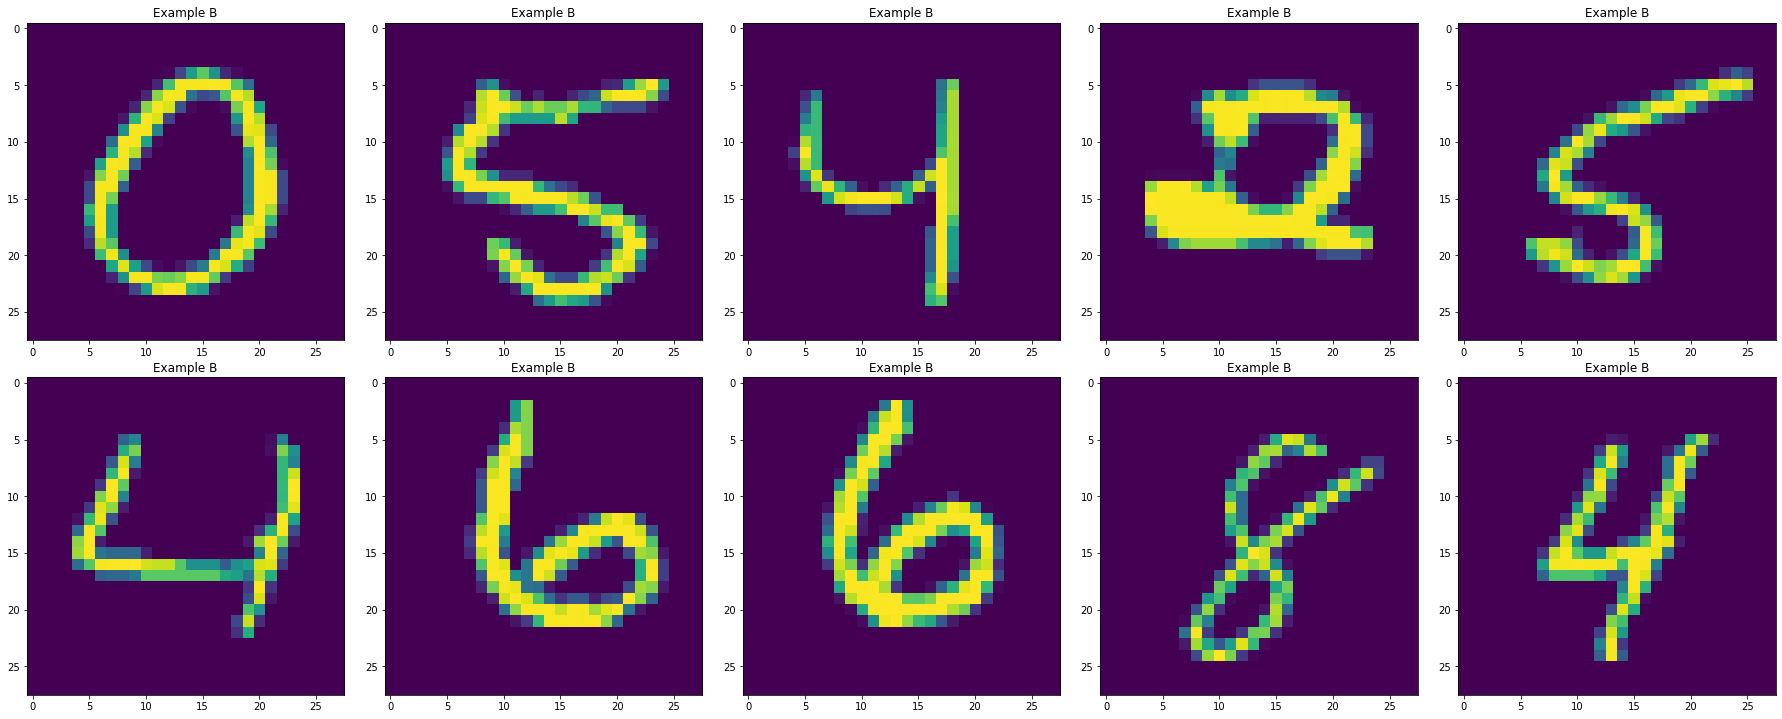

In [38]:
# load the mnist dataset
X_train, Y_train, X_val, Y_val = load_mnist_dataset()

def getDataset(X, y):
    """
    Separate the positve labels for digit 1 and negative labels for other digits
    """
    exampleA = []
    exampleB = []
    for i in range(len(y)):
        if(y[i] == 1):
            exampleA.append(X[i])
        else:
            exampleB.append(X[i])
    exampleA = np.array(exampleA)
    exampleB = np.array(exampleB)
    return exampleA, exampleB

# separate 
exampleA, exampleB = getDataset(X_train, Y_train)


width = 5
height = 5
rows = 2
cols = 5
axes = []

print("Positive label")
fig=plt.figure(figsize=(25,10))
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Example A")
    axes[-1].set_title(subplot_title)  
    plt.imshow(exampleA[a].reshape(28,28))
fig.tight_layout()    
plt.show()

print("Negative label")
fig=plt.figure(figsize=(25,10))
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Example B")
    axes[-1].set_title(subplot_title)  
    plt.imshow(exampleB[a].reshape(28,28))
fig.tight_layout()    
plt.show()

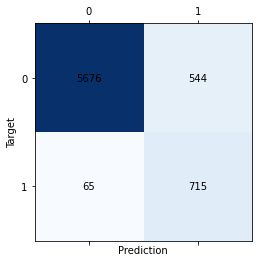

In [39]:
# result 
A, cost_list, iter_list = nnclass(exampleA, exampleB[0:len(exampleA),:], X_val, 64)

# mask the labels for testing 
Y_val[Y_val != 1] = 0
Y_val[Y_val == 1] = 1

# confusion matrix
cm = confusion_matrix(Y_val, (A >0.5))
plot_confusion_matrix(cm)

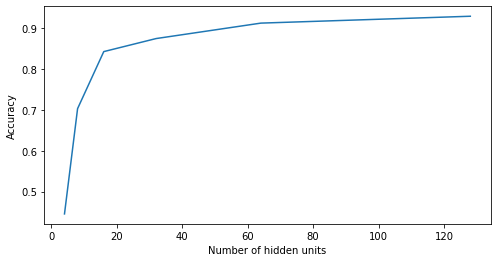

In [40]:
# mask the labels for testing 
Y_val[Y_val != 1] = 0
Y_val[Y_val == 1] = 1

from sklearn.metrics import accuracy_score

# list of accuracy scores
accuracy_list = []
# testing for number of hidden units per layer 
hidden_unit_list = [4, 8, 16, 32, 64, 128]
# iterate to find the scores
for i in hidden_unit_list:
    # compute
    A, cost_list, iter_list = nnclass(exampleA, exampleB[0:len(exampleA),:], X_val, i)
    score = accuracy_score(Y_val, (A>0.5))
    # add to the list 
    accuracy_list.append(score)

# The accuracy vs hidden units graph
plt.figure(figsize=(8,4))
plt.plot(hidden_unit_list, accuracy_list)
plt.xlabel("Number of hidden units")
plt.ylabel("Accuracy")
plt.show()

The change of number of hidden units can significantly affects the accuracy of the Neural network prediction. The graph above shows that the increasing number of hidden units tends to have better accuracy in predicting the label correctly. However, there is a diminishing return in accuracy score as the number increase from 64 to 128 or more.